In [23]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from ipywidgets import interact
from PIL import Image

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#generate a list [0,1,2,....9]
output_labels = list(sorted(set(y_train)))

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2)
model.evaluate(x_test, y_test)

Epoch 1/2
60000/60000 [==============================] - 9s 155us/step - loss: 0.2036 - acc: 0.9411
Epoch 2/2
10000/10000 [==============================] - 0s 36us/step


[0.087113881733547893, 0.97270000000000001]

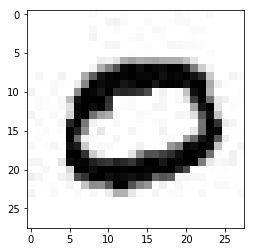

In [22]:
digit = Image.open("test_images/img_2.jpg").resize((28,28))

# convert to greyscale
digit = np.array(digit.convert("L"))
plt.imshow(digit, cmap="binary")


In [21]:
# Predict the digit in the student number
predict_array = model.predict(np.reshape(digit, (1,digit.shape[0], digit.shape[1])),
                    verbose=1)
predict_array
print("Digit recognized = ", output_labels[np.argmax(predict_array)])

1/1 [==============================] - 0s 787us/step
Digit recognized =  0


array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)